# Task 2: Credit card fraud detection

In [50]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, precision_recall_curve, auc, confusion_matrix
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

In [51]:
# Load data
df = pd.read_csv('creditcard.csv')

# Display the first 5 rows of the DataFrame
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [52]:
# Get the shape of the DataFrame
df.shape

(284807, 31)

In [53]:
# Get summary statistics
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [54]:
# Get information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [55]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [56]:
# Separate features and target
X = df.drop('Class', axis=1)  # Assuming 'Class' is the target column
y = df['Class']


In [57]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Shape of X_train ", X_train.shape)
print("Shape of X_test ", X_test.shape)
print("Shape of Y_train ", y_train.shape)
print("Shape of Y_test ", y_test.shape)


Shape of X_train  (227845, 30)
Shape of X_test  (56962, 30)
Shape of Y_train  (227845,)
Shape of Y_test  (56962,)


In [58]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [59]:
# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)


In [60]:
# Print class distribution
print("Original class distribution:")
print(pd.Series(y_train).value_counts(normalize=True))

print("-----------------------------------\n")

print("Balanced class distribution:")
print(pd.Series(y_train_balanced).value_counts(normalize=True))

Original class distribution:
Class
0    0.998271
1    0.001729
Name: proportion, dtype: float64
-----------------------------------

Balanced class distribution:
Class
0    0.5
1    0.5
Name: proportion, dtype: float64


In [61]:
# Train logistic regression model
model = LogisticRegression(max_iter=1000, class_weight='balanced',random_state=42)
model.fit(X_train_balanced, y_train_balanced)

# Make predictions
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

In [62]:
# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
pr_auc = auc(recall, precision)


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962



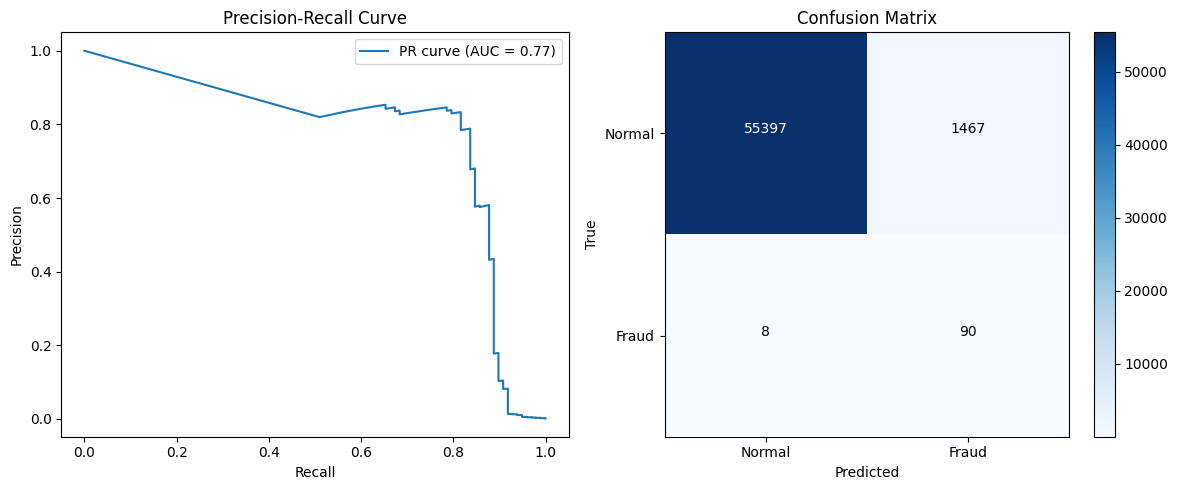

In [63]:
# Plotting results
plt.figure(figsize=(12, 5))

# Plot 1: Precision-Recall curve
plt.subplot(1, 2, 1)
plt.plot(recall, precision, label=f'PR curve (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()

# Plot 2: Confusion Matrix
plt.subplot(1, 2, 2)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Normal', 'Fraud'])
plt.yticks(tick_marks, ['Normal', 'Fraud'])

# Add text annotations to confusion matrix
thresh = cm.max() / 2
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], 'd'),
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
plt.show()

The model's overall performance shows moderate effectiveness in detecting credit card fraud, as indicated by the Precision-Recall curve with an AUC of 0.77. The curve maintains strong precision until about 80% recall, after which it drops sharply, suggesting the model performs well up to a certain point but struggles when trying to identify all fraud cases.

Looking at the confusion matrix, we can see the model's real-world application results. Out of approximately 57,000 transactions, the model correctly identified 55,397 legitimate transactions and 90 fraudulent ones. However, it also flagged 1,467 legitimate transactions as fraudulent (false positives) while missing 8 actual fraud cases (false negatives). This demonstrates a highly imbalanced dataset, which is typical in fraud detection scenarios where legitimate transactions far outnumber fraudulent ones.

From a business perspective, the model shows a conservative approach to fraud detection. With a 91.8% fraud detection rate (catching 90 out of 98 fraud cases), it prioritizes catching fraud over minimizing false alarms. While this results in good fraud prevention, it comes at the cost of flagging many legitimate transactions (1,467) as suspicious. This trade-off means that while the bank maintains strong security against fraud, it may need to manage customer inconvenience from false fraud alerts. The low number of missed fraud cases (8) suggests the model is effectively minimizing the most costly type of error in fraud detection.

For practical implementation, this model would be most suitable in situations where the cost of missing fraud is much higher than the cost of investigating false alarms. However, there might be room for improvement in reducing false positives while maintaining the strong fraud detection rate, possibly through threshold adjustment or additional feature engineering.

In [64]:
# Print additional metrics
print("\nModel Performance Metrics:")
print(f"Precision-Recall AUC: {pr_auc:.3f}")

# Print model coefficients (feature importance)
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': np.abs(model.coef_[0])
})
print("\nTop 10 Most Important Features:")
display(feature_importance.sort_values('Importance', ascending=False).head(10))




Model Performance Metrics:
Precision-Recall AUC: 0.770

Top 10 Most Important Features:


,Feature,Importance
29,Amount,2.270462
1,V1,1.815385
10,V10,1.713830
14,V14,1.629045
4,V4,1.584424
5,V5,1.294254
17,V17,1.149217
12,V12,1.086633
16,V16,1.077560
20,V20,1.008791


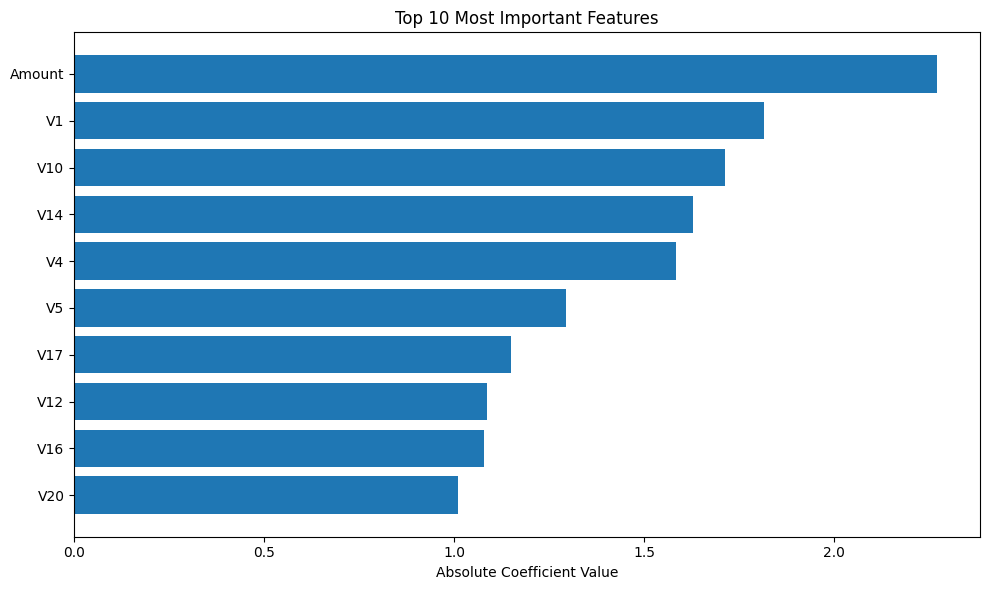

In [65]:
# Visualize feature importance
plt.figure(figsize=(10, 6))
top_features = feature_importance.sort_values('Importance', ascending=True).tail(10)
plt.barh(top_features['Feature'], top_features['Importance'])
plt.title('Top 10 Most Important Features')
plt.xlabel('Absolute Coefficient Value')
plt.tight_layout()
plt.show()

The transaction amount emerges as the most crucial predictor of fraud, with the highest coefficient value of ~2.0, indicating that unusual transaction values are key indicators of potential fraud.


The next tier of important predictors includes anonymized features V1, V10, V14, and V4, with coefficients between 1.5-2.0, suggesting these transformed variables capture significant patterns in fraudulent behavior.


Mid-range features (V5, V17, V12, V16, V20) show moderate importance with coefficients around 1.0, acting as supporting indicators in the fraud detection process.


This hierarchical feature importance suggests that while transaction amount is the primary indicator, the model relies on a comprehensive analysis of multiple features to effectively detect fraudulent activities.